In [16]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

***Data Reading***

In [17]:
c1 = "B:\OneDrive - Amity University\Desktop\Orison Tech\Model_2\Housing.csv"

In [18]:
df = pd.read_csv(c1)
df = pd.DataFrame(df)
print(df)


        price  area  bedrooms  bathrooms  stories  parking
0    13300000  7420         4          2        3        2
1    12250000  8960         4          4        4        3
2    12250000  9960         3          2        2        2
3    12215000  7500         4          2        2        3
4    11410000  7420         4          1        2        2
..        ...   ...       ...        ...      ...      ...
540   1820000  3000         2          1        1        2
541   1767150  2400         3          1        1        0
542   1750000  3620         2          1        1        0
543   1750000  2910         3          1        1        0
544   1750000  3850         3          1        2        0

[545 rows x 6 columns]


***Data Inspection***

In [19]:
df.shape

(545, 6)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      545 non-null    int64
 1   area       545 non-null    int64
 2   bedrooms   545 non-null    int64
 3   bathrooms  545 non-null    int64
 4   stories    545 non-null    int64
 5   parking    545 non-null    int64
dtypes: int64(6)
memory usage: 25.7 KB


***Data Cleaning***

In [21]:
df.isnull().sum()*100/df.shape[0]


price        0.0
area         0.0
bedrooms     0.0
bathrooms    0.0
stories      0.0
parking      0.0
dtype: float64

***Correlation between columns***

<Axes: >

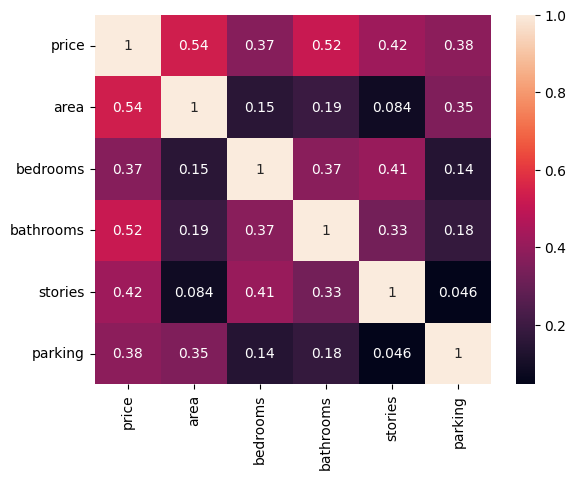

In [22]:

sns.heatmap(df.corr(),annot = True)

***Select feature and target column based on correlation***

In [23]:

X = df[['area','bedrooms','stories','parking']]
y = df['price']

***Split data into Train and test set***

In [24]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 41)


***Building a Linear Regression Model***

In [31]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor()

In [33]:
# Train the model
rf_model.fit(x_train, y_train)


RandomForestRegressor()

In [40]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

***Predictions on the Test Set***

In [37]:
print(f'Random Forest MSE: {rf_mse}')
print(f'Random Forest R-squared: {rf_r2}')

Random Forest MSE: 1982006402030.941
Random Forest R-squared: 0.4332615488654995


***Looking at the MSE***

In [41]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2131843559008.083
R-squared: 0.390416844539314


***Visualizing the fit on the test set***

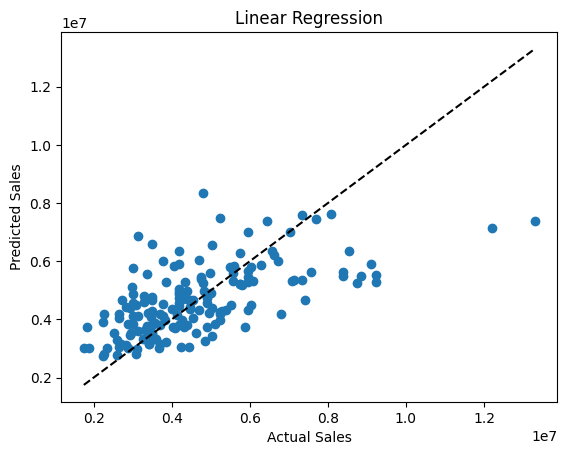

In [42]:

plt.scatter(y_test, y_pred)


plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Linear Regression')


lims = [min(min(y_test), min(y_pred)), max(max(y_test), max(y_pred))]
plt.plot(lims, lims, 'k--')


plt.show()


**RandomForestRegressor**

In [44]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(x_train, y_train)

# Make predictions
rf_y_pred = rf_model.predict(x_test)

# Evaluate the model's performance
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print(f'Random Forest MSE: {rf_mse}')
print(f'Random Forest R-squared: {rf_r2}')

Random Forest MSE: 2060358161850.4993
Random Forest R-squared: 0.4108575066997944


**Improving Perfomance GridSearchCV**

In [45]:
from sklearn.model_selection import GridSearchCV

# Example for tuning Random Forest hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None]
}

# Initialize the GridSearchCV with RandomForestRegressor
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Best parameters found
print(f'Best parameters: {grid_search.best_params_}')


Best parameters: {'max_depth': 10, 'n_estimators': 100}


**Visualizing Predictions**

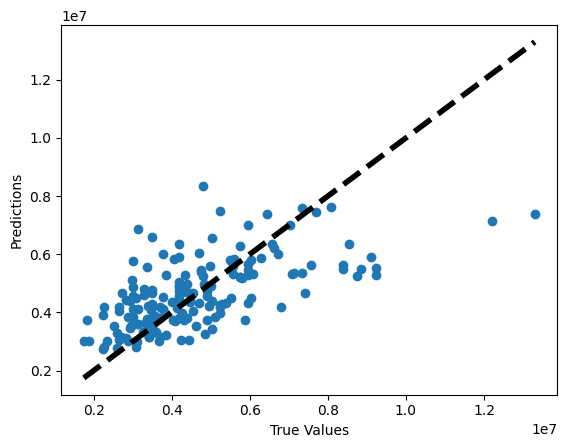

In [46]:
import matplotlib.pyplot as plt

# Plot the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()
